### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

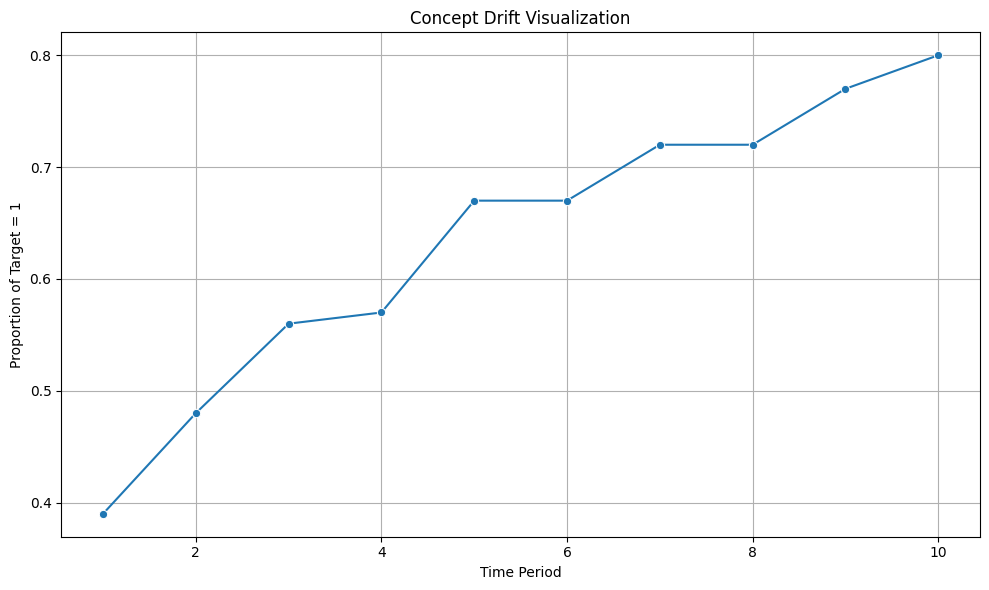

In [2]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Simulate the Dataset ---
def simulate_concept_drift(n_samples=1000, n_time_periods=10):
    """
    Simulate a binary classification dataset with concept drift.
    Args:
        n_samples (int): Number of total samples to simulate.
        n_time_periods (int): Number of time periods for concept drift simulation.
        
    Returns:
        pd.DataFrame: Simulated dataset with 'Time' and 'Target' columns.
    """
    # Validate inputs
    try:
        if not isinstance(n_samples, int) or n_samples <= 0:
            raise ValueError("Number of samples must be a positive integer.")
        if not isinstance(n_time_periods, int) or n_time_periods <= 0:
            raise ValueError("Number of time periods must be a positive integer.")
    except ValueError as e:
        print(f"Input validation error: {e}")
        return pd.DataFrame()  # Return empty DataFrame in case of error
    
    # Time periods
    time_periods = np.linspace(1, n_time_periods, n_time_periods)
    
    # Simulate initial distribution of the binary target (0 or 1)
    initial_class_prob = 0.6
    
    # Container for data
    data = []
    
    # Gradually change the distribution of the target variable over time
    for time in time_periods:
        # Simulate a drift where the probability of class 1 increases over time
        drift_factor = 0.4 * (time / n_time_periods)  # Gradual shift from 0.6 to 0.5
        class_0_prob = initial_class_prob - drift_factor
        class_1_prob = 1 - class_0_prob
        
        # Simulate the target variable for each time period
        target = np.random.choice([0, 1], size=n_samples//n_time_periods, p=[class_0_prob, class_1_prob])
        
        # Add to dataset
        for t in target:
            data.append((time, t))
    
    # Create a DataFrame
    df = pd.DataFrame(data, columns=["Time", "Target"])
    return df

# --- Step 2: Process Data ---
def process_data_for_plotting(df):
    """
    Group the data by time and calculate the mean of the target to get the proportion of class 1.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the simulated data.
        
    Returns:
        pd.Series: Proportion of class 1 over time periods.
    """
    try:
        # Group by time and calculate the proportion of 1s in the target
        drift_plot = df.groupby("Time")["Target"].mean()
        return drift_plot
    except Exception as e:
        print(f"Error during data processing: {e}")
        return pd.Series()  # Return empty series in case of error

# --- Step 3: Plot Concept Drift ---
def plot_concept_drift(drift_plot):
    """
    Plot the concept drift over time.
    
    Args:
        drift_plot (pd.Series): The proportion of class 1 over time periods.
    """
    try:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=drift_plot.index, y=drift_plot.values, marker='o')
        plt.title("Concept Drift Visualization")
        plt.xlabel("Time Period")
        plt.ylabel("Proportion of Target = 1")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error during plotting: {e}")

# --- Step 4: Execute and Visualize ---
# Simulate data with 1000 samples and 10 time periods
df_concept_drift = simulate_concept_drift(n_samples=1000, n_time_periods=10)

if not df_concept_drift.empty:
    # Process data for plotting
    drift_plot = process_data_for_plotting(df_concept_drift)
    
    if not drift_plot.empty:
        # Plot the concept drift
        plot_concept_drift(drift_plot)
